# Austin Crime Clearance
According to the FBI's 2019 NIBRS Crime Data Report, Austin, Texas ranks in the top ten safest large cities in the United States. Austin itself has a little under 1 million residents within the city, and over 2 million residents in the metro area.
## Importing Packages & Examining Data
We'll start by importing the pandas, matplotlib, and datetime packages and using pandas' `.read_csv()` function to save our data file to a variable.

In [2]:
# imports libraries we'll need for this project
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import numpy as np

# loads our data into a variable
df = pd.read_csv('2016_austin_crime.csv')

Now, we can use pandas' built-in `.info()` function to learn more about our data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37461 entries, 0 to 37460
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   GO Primary Key                         37460 non-null  float64
 1   Council District                       37205 non-null  float64
 2   GO Highest Offense Desc                37461 non-null  object 
 3   Highest NIBRS/UCR Offense Description  37461 non-null  object 
 4   GO Report Date                         37461 non-null  object 
 5   GO Location                            36702 non-null  object 
 6   Clearance Status                       35742 non-null  object 
 7   Clearance Date                         35742 non-null  object 
 8   GO District                            37461 non-null  object 
 9   GO Location Zip                        37294 non-null  float64
 10  GO Census Tract                        37294 non-null  float64
 11  GO

Above, we can see that some of our column names aren't very descriptive, lots of rows have `NULL` values, and the data types of some of our columns aren't very fitting.

## Cleaning Data
### Removing Null Values
We have a few columns that contain `NULL` values. Because we have over 30,000 rows of data, we can afford to snip these entries out and only work with complete rows. So, we'll redefine our dataframe to be all rows in the data with no `NULL` values.

In [4]:
# calculates the number of null values before and after we remove them
print('Before we redefine our data, we have', df.isna().sum().sum(), 'rows with null values.')
df = df.dropna()
print('After we redefine our data, we have', df.isna().sum().sum(), 'rows with null values.')

Before we redefine our data, we have 6522 rows with null values.
After we redefine our data, we have 0 rows with null values.


### Changing Column Data Types
In general, we want all columns with decimals to be `float64`, columns with integers to be `int64`, columns with strings to be `object`, and columns with dates to be `datetime64[ns]`. When we used the `.info()` function, we saw several columns where this wasn't the case. To fix this, we'll make lists of the columns that need to be changed, then loop through those lists and change each column type to the appropriate one.

In [5]:
# establishes lists of columns that we'll need to change the types of
int_cols = ['GO Primary Key', 'Council District', 'GO Location Zip', 'GO X Coordinate', 'GO Y Coordinate']
date_cols = ['GO Report Date', 'Clearance Date']

# changes the integer columns
for col in int_cols:
    df[col] = df[col].astype(int)

# # changes the date columns
# for col in date_cols:
#     df[col] = pd.to_datetime(df[col])

# displays our new column types
df.dtypes

GO Primary Key                             int64
Council District                           int64
GO Highest Offense Desc                   object
Highest NIBRS/UCR Offense Description     object
GO Report Date                            object
GO Location                               object
Clearance Status                          object
Clearance Date                            object
GO District                               object
GO Location Zip                            int64
GO Census Tract                          float64
GO X Coordinate                            int64
GO Y Coordinate                            int64
dtype: object

Great! Now, all of our columns are the correct type; this will make working with them much easier. 
### Changing Column Names
A lot of the columns in our dataframe have labels that aren't very self explanatory. We can change this by removing the string 'GO', replacing spaces with underscores, removing whitespace, and making each label lowercase. Luckily, we can define a function that can do all of this for us.

In [6]:
# defines a function to clean our column names
def clean_columns(col):
  if col == 'Highest NIBRS/UCR Offense Description':
    col = 'fbi_desc'
  elif col == 'GO Highest Offense Desc':
    col = 'apd_desc'
  col = col.replace('GO', '')
  col = col.strip()
  col = col.replace(' ', '_')
  col = col.lower()
  return col

# establishes a list for our cleaned columns and cleans each column in our data
new_cols = []
for col in df.columns:
  cleaned_col = clean_columns(col)
  new_cols.append(cleaned_col)

# assigns the columns in our data to be the ones we just cleaned
df.columns = new_cols
df.columns

Index(['primary_key', 'council_district', 'apd_desc', 'fbi_desc',
       'report_date', 'location', 'clearance_status', 'clearance_date',
       'district', 'location_zip', 'census_tract', 'x_coordinate',
       'y_coordinate'],
      dtype='object')

That looks much better! Each of our columns is a lot easier to read and understand now.

## Analyzing The Data
For this project, we're going to be focused on the columns related to the clearance of crimes in the data. Specifically, we're going to look at factors like location, time of year, and type of crime to see if they have any correlation with the clearance of crimes.

### Type of Crime
We'll mostly be considering the values in the `fbi_desc` column, which are FBI crime codes; a list of them can be found in the cell below. Note that the `apd_desc` column also contains crime codes, but for the Austin Police Department. The APD codes are more in detail and greater in number, so it will be easier to work with the FBI codes instead.

In [7]:
# shows the fbi crime codes
print('The FBI codes:')
print(df['fbi_desc'].unique())

print('\n')

# shows the apd crime codes
print("The APD codes:")
print(df['apd_desc'].unique())

The FBI codes:
['Agg Assault' 'Theft' 'Robbery' 'Burglary' 'Auto Theft' 'Murder']


The APD codes:
['AGG ASLT ENHANC STRANGL/SUFFOC' 'THEFT                         '
 'AGG ROBBERY/DEADLY WEAPON     ' 'DEADLY CONDUCT                '
 'ROBBERY BY ASSAULT            ' 'AGG ASSAULT FAM/DATE VIOLENCE '
 'AGG ASLT STRANGLE/SUFFOCATE   ' 'BURGLARY NON RESIDENCE        '
 'BURGLARY OF RESIDENCE         ' 'AUTO THEFT                    '
 'BURGLARY OF VEHICLE           ' 'THEFT BY SHOPLIFTING          '
 'AGG ASLT W/MOTOR VEH FAM/DAT V' 'THEFT OF LICENSE PLATE        '
 'THEFT FROM BUILDING           ' 'AGG ASSAULT                   '
 'THEFT FROM AUTO               ' 'THEFT OF BICYCLE              '
 'BURG NON RESIDENCE SHEDS      ' 'AGG ROBBERY BY ASSAULT        '
 'THEFT OF TRAILER              ' 'THEFT FROM PERSON             '
 'THEFT OF AUTO PARTS           ' 'THEFT OF METAL                '
 'AGG ASSAULT WITH MOTOR VEH    ' 'AGG ASSAULT ON PUBLIC SERVANT '
 'BREACH OF COMPUTER SECURITY 

The FBI code of Theft makes up most of the crime with Burglary being a very distant second. The crime that occurs the least amount is Murder, with only 30 reported instances (0.09% of total crime) in our data.

Text(0.5, 1.0, '% of Crimes By FBI Code')

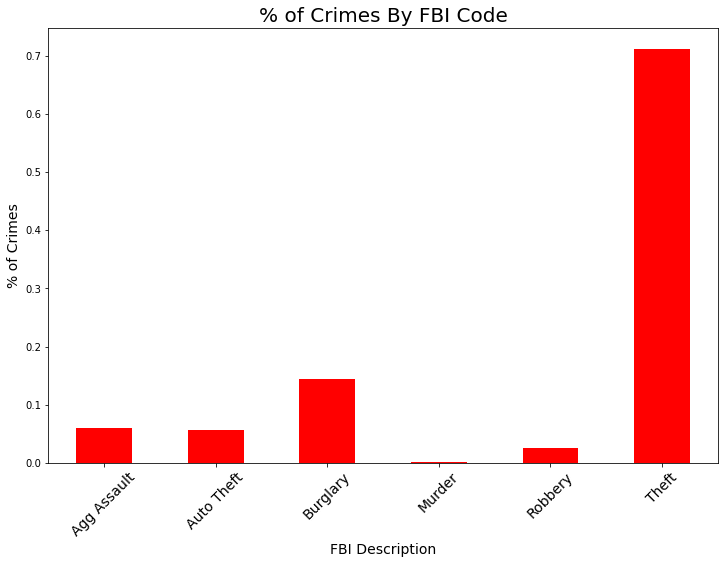

In [8]:
# groups our data by crime type and graphs it
crime_count = (df.groupby('fbi_desc')['primary_key'].count() / df.shape[0])
ax1 = crime_count.plot(kind = 'bar', figsize = (12, 8), color = 'red')

# alters some aesthetic elements of our graph
ax1.tick_params(axis = 'x', rotation = 45, labelsize = 14)
plt.ylabel('% of Crimes', fontsize = 14)
plt.xlabel('FBI Description', fontsize = 14)
ax1.set_title('% of Crimes By FBI Code', fontsize = 20)

Over 80% of crimes in Austin are not cleared. There could be many reasons for this, first let's look at the distribution of clearance status when FBI codes are being considered.

Text(0.5, 1.0, '% Cleared By Clearance Status')

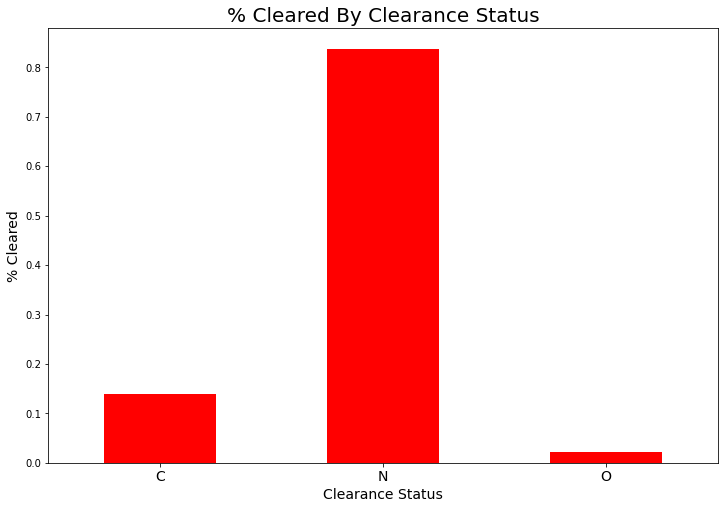

In [9]:
# plots our percentages of crimes by clearance status
clearance = (df.groupby('clearance_status')['primary_key'].count() / df.shape[0])
ax2 = clearance.plot(kind = 'bar', figsize = (12, 8), color = 'red')

# updates graph details
ax2.tick_params(axis = 'x', rotation = 0, labelsize = 14)
plt.xlabel('Clearance Status', fontsize = 14)
plt.ylabel('% Cleared', fontsize = 14)
ax2.set_title('% Cleared By Clearance Status', fontsize = 20)

There does seem to be some variance between the types of crime and their clearance rates. Theft, Burglary, and Auto Theft are often not cleared, whereas Robbery and Agg Assault are cleared more often. Despite being the crime that occurs the least amount, Murder is cleared over 90% of the time. Meaning of the 30 instances of Murder, 28 were cleared.

Text(0.5, 1.0, 'Clearance Status By FBI Description')

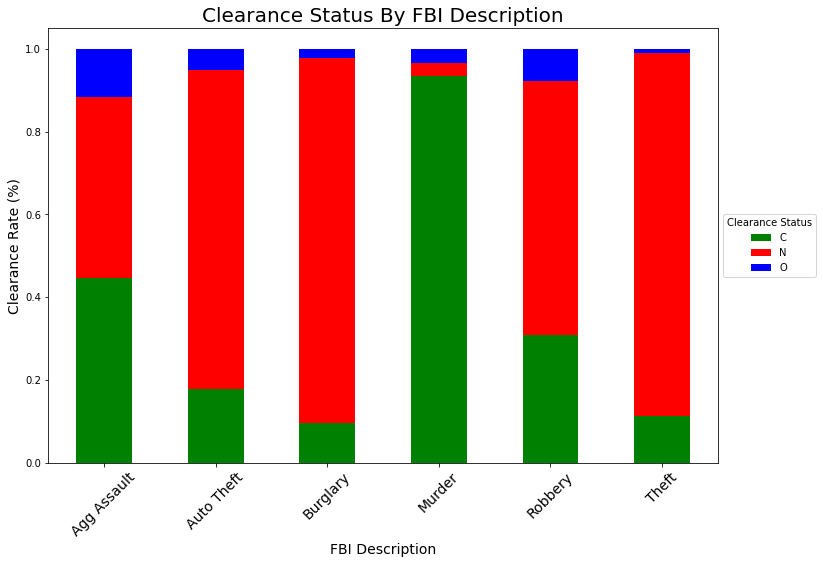

In [10]:
clearance_desc = df.groupby(['fbi_desc', 'clearance_status'])['primary_key'].count()
clearance_count = df.groupby(['fbi_desc'])['primary_key'].count()

# plots a stacked bar chart grouped by fbi code and clearance status
graph = (clearance_desc / clearance_count).unstack('clearance_status')
ax3 = graph.plot(kind = 'bar', stacked = True, figsize = (12, 8), color = ['green', 'red', 'blue'])

# updates graph details
ax3.tick_params(axis = 'x', rotation = 45, labelsize = 14)
plt.xlabel('FBI Description', fontsize = 14)
plt.ylabel('Clearance Rate (%)', fontsize = 14)
ax3.legend(title = 'Clearance Status', loc = 'center left', bbox_to_anchor=(1, 0.5))
ax3.set_title('Clearance Status By FBI Description', fontsize = 20)

Petty Theft, Burglary of a Vehicle, and Shoplifting are the crimes that occur the most in Austin according to the APD descriptions. These are crimes that are hard to clear because the victim usually doesn't know that the crime has occurred until it is too late. Thus, the police response is delayed making the case harder to solve.

Text(0.5, 1.0, 'APD Crime Counts')

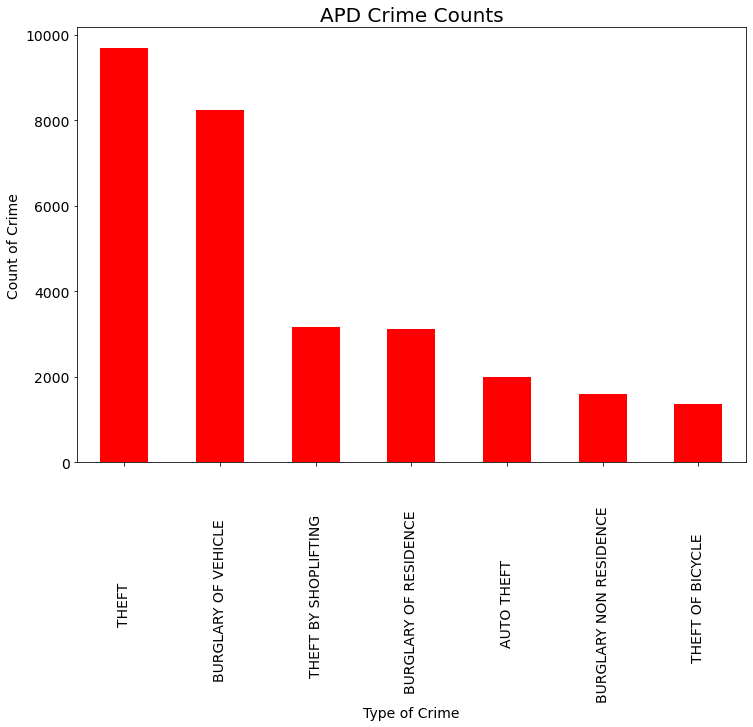

In [11]:
apd_count = df['apd_desc'].value_counts().nlargest(7)
ax6 = apd_count.plot(kind = 'bar', figsize = (12, 8), color = 'red')


ax6.tick_params(axis = 'x', labelsize = 14)
ax6.tick_params(axis = 'y', labelsize = 14)
plt.xlabel('Type of Crime', fontsize = 14)
plt.ylabel('Count of Crime', fontsize = 14)
ax6.set_title('APD Crime Counts', fontsize = 20)

### Time of Year

It's easy to assume what months crime will pick up in; most people would guess summer or winter, let's see if they're right. To start, we'll split our date column up into day, month, and year so it's easier to sort.

In [12]:
# makes new columns for the day, month, and year of each crime instance
df[['day',"month",'yr']] = df["clearance_date"].str.split(pat="-", expand=True)

For Austin in 2016, it appears that the top 5 months with the most crime were November, August, January, May, and December. All of these are either summer or winter months, so the general assumption that that is when crime occurs the most would be correct for this dataset.

Text(0.5, 1.0, 'Count of Crimes by Month')

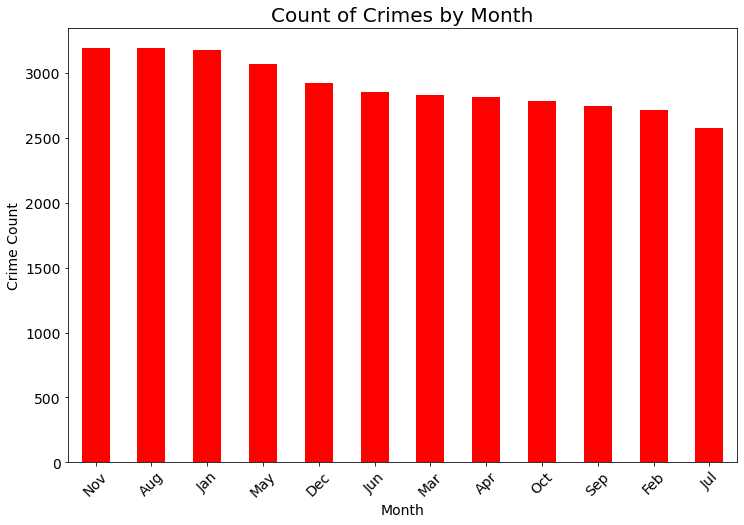

In [13]:
# creates a plot of crime counts by month
ax8 = df['month'].value_counts().plot(kind = 'bar', figsize = (12, 8), color = 'red')

ax8.tick_params(axis = 'x', labelsize = 14, rotation = 45)
ax8.tick_params(axis = 'y', labelsize = 14)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Crime Count', fontsize = 14)
ax8.set_title('Count of Crimes by Month', fontsize = 20)

Even though the aforementioned months had the most crime, the month with the highest clearing percentage is April. However, there does not appear to be any specific rhyme or reason for this.

Text(0.5, 1.0, 'Clearing Percentages per Month ')

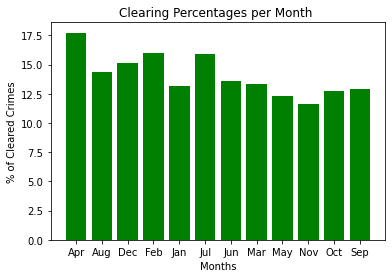

In [18]:
#now focusing on clearance status in each month and also looking ar council districts
crime_types_ct=df.groupby(["council_district","fbi_desc","apd_desc","clearance_status","month"])['primary_key'].count().reset_index()
crime_types_ct.rename(columns={"primary_key":"count"},inplace=True)
months_crimes = crime_types_ct.groupby(['month','clearance_status']).sum().sort_values(['count'], ascending=False)
months_crimes = months_crimes.reset_index()
cleared_crimes = months_crimes.loc[months_crimes["clearance_status"]=='C']
total_crimes = months_crimes.groupby('month').sum().reset_index()

cleared = cleared_crimes['count'].tolist()
totals = total_crimes['count'].tolist()
months = total_crimes['month'].tolist()

result = []
result = [((a/b)*100) for a,b in zip(cleared, totals)]

plt.bar(months, height = result, color = 'green')
plt.xlabel('Months')
plt.ylabel('% of Cleared Crimes')
plt.title('Clearing Percentages per Month ')

Now, let's look at the numbers for each clearance category while considering the month.

Text(0.5, 1.0, 'Clearance Numbers per Month')

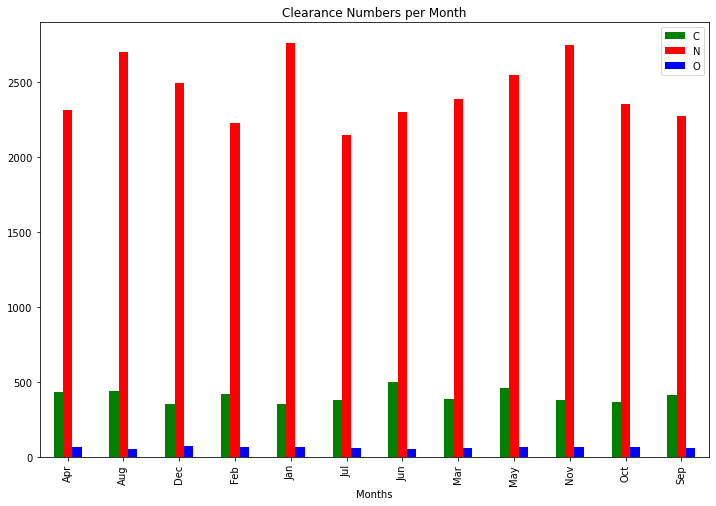

In [20]:
##bar chart of all months with their cleareance numbers
#months_crimes=months_crimes.drop(columns={'council_district'})

month_clearance = months_crimes.groupby(['clearance_status','month']).sum().sort_values(by='month',ascending=False).unstack(0)
ax7 = month_clearance.plot.bar(figsize=(12,8),color = ['green', 'red', 'blue'])

ax7.legend(["C", "N",'O'])
plt.xlabel('Months')
plt.title('Clearance Numbers per Month')

### Location
In regards to location, our data is split up by zip codes. Our dataset contains 46 unique zip codes that belong to locations in and around Austin.

In [21]:
#finding the total number of zip codes in the data
df['location_zip'].nunique()

46

For our plots, we're going to be focused on the top and bottom 10 zip codes for crime occurrences. Here they are along with their counts of crime, respectively.

In [22]:
# finding the top 10 zip codes for crimes
df.groupby('location_zip')['primary_key'].count().nlargest(10)

location_zip
78741    3121
78753    2904
78704    2380
78758    2281
78745    2108
78701    1963
78723    1959
78744    1807
78702    1497
78748    1273
Name: primary_key, dtype: int64

In [23]:
# finding the lowest 10 zip codes for crimes
df.groupby('location_zip')['primary_key'].count().nsmallest(10)

location_zip
78732      1
78737      1
78728      4
78712      5
78652     16
78653     39
78730     46
78742     54
78725     68
78736    114
Name: primary_key, dtype: int64

In order to make our plots, we'll create new columns in our dataframe that indicate whether or not the value in the `location_zip` column is in the top or bottom 10. Then, we can use boolean indexing to sort out instances that occurred in the zip codes we're looking for, and plot those.

In [24]:
# creating a list with the 10 lowest and highest crime rate zip codes
lowest_locations= [78732, 78737, 78728, 78712, 78652, 78653, 78730, 78742, 78725, 78736]
highest_locations= [78741, 78753, 78704, 78758, 78745, 78701, 78723, 78744, 78702, 78748]

# creating new columns to indicate if the zip code is part of the lists we just made
df['ten_lowest_locations'] = df['location_zip'].isin(lowest_locations)
df['ten_highest_locations'] = df['location_zip'].isin(highest_locations)

In alignment with our previous findings, most crimes in the top 10 zip codes have not been cleared. The highest clearing zip code is 78753, which clears about 20% of crimes that occur.

Text(0.5, 1.0, 'Clearance Status By Location Zip Code (Top 10)')

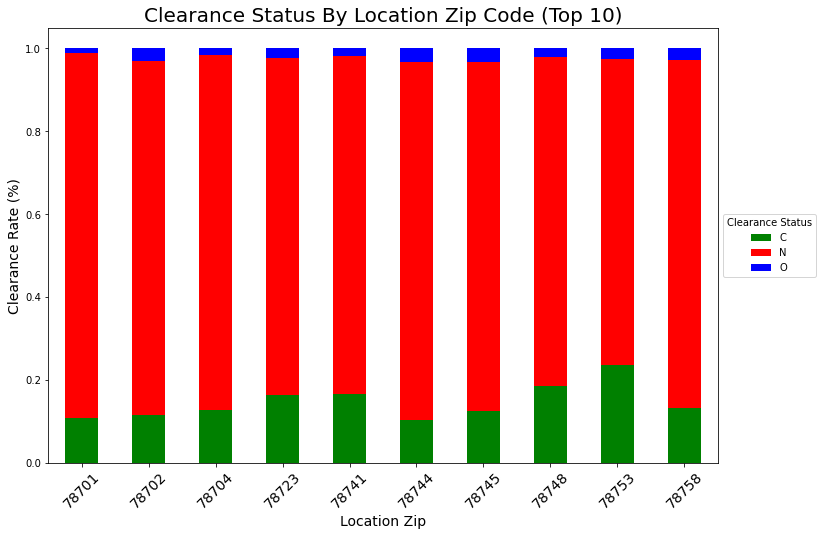

In [25]:
# creates a new dataframe that only includes the instances of crime in the top 10 zip codes
top10_df = df.loc[df['ten_highest_locations'] == True]

# creates variables that we can use in our plot
top_clearance_location = top10_df.groupby(['location_zip', 'clearance_status'])['primary_key'].count()
top_crime_count = top10_df.groupby(['location_zip'])['primary_key'].count()

# creates a percentage plot for clearance status of the top 10 zip codes
top10_graph = (top_clearance_location / top_crime_count).unstack('clearance_status')
ax4 = top10_graph.plot(kind = 'bar', stacked = True, figsize = (12, 8), color = ['green', 'red', 'blue'])

# alters some aesthetic elements of our graph
ax4.tick_params(axis = 'x', rotation = 45, labelsize = 14)
plt.xlabel('Location Zip', fontsize = 14)
plt.ylabel('Clearance Rate (%)', fontsize = 14)
ax4.legend(title = 'Clearance Status', loc = 'center left', bbox_to_anchor=(1, 0.5))
ax4.set_title('Clearance Status By Location Zip Code (Top 10)', fontsize = 20)

Surprisingly, the locations with less amounts of crime appear to struggle even more than locations with high amounts of crime in regards to clearing their cases. A contributing factor to this could be police presence within the location.

Text(0.5, 1.0, 'Clearance Status By Location Zip Code (Bottom 10)')

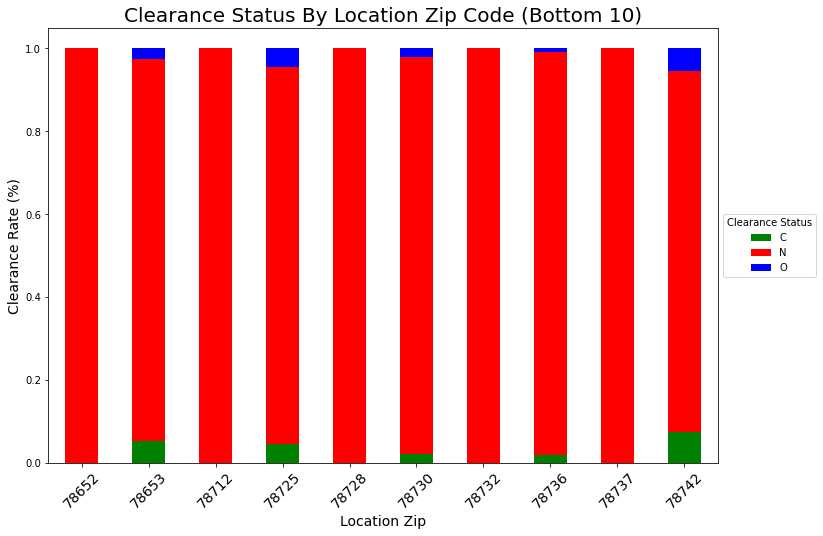

In [26]:
# creates a new dataframe that only includes the instances of crime in the top 10 zip codes
bot10_df = df.loc[df['ten_lowest_locations'] == True]

# creates variables that we can use in our plot
bot_clearance_location = bot10_df.groupby(['location_zip', 'clearance_status'])['primary_key'].count()
bot_crime_count = bot10_df.groupby(['location_zip'])['primary_key'].count()

# creates a percentage plot for clearance status of the bottom 10 zip codes
bot10_graph = (bot_clearance_location / bot_crime_count).unstack('clearance_status')
ax5 = bot10_graph.plot(kind = 'bar', stacked = True, figsize = (12, 8), color = ['green', 'red', 'blue'])

# alters some aesthetic elements of our graph
ax5.tick_params(axis = 'x', rotation = 45, labelsize = 14)
plt.xlabel('Location Zip', fontsize = 14)
plt.ylabel('Clearance Rate (%)', fontsize = 14)
ax5.legend(title = 'Clearance Status', loc = 'center left', bbox_to_anchor=(1, 0.5))
ax5.set_title('Clearance Status By Location Zip Code (Bottom 10)', fontsize = 20)

## Conclusions
After analyzing our data, we've made several observations and would like to recommend some changes that the Austin Police Department could make in order to better their clearance rates.

Theft occurs a staggering amount of times compared to other crimes. Coupled with the fact that it has a very low clearance rate makes it a real issue. Although most of these occurrences are petty crimes that the police could not take much action on, there are a few preventative measures that could be put in place. Preventative measures like increasing gate security at parking lots, encouraging residents to get security systems, and adding signage to high-theft areas are all things that could help lower the amount of occurrences, and increase clearance.

The Austin Police Department appears to be very efficient at solving murder cases, so no need to recommend any changes in that department.

Increased patrolling around the winter and summer months could help relieve some of the crime that occurs. This idea also applies to the zip codes with high amounts of crime. Having authorities in the area helps increase response time to crime scenes, which gives the crime a better chance of being cleared.